In [1]:
import pandas as pd
import matplotlib.pyplot as plt
calendar = pd.read_csv('calendar.csv')

### Pandas版本

In [2]:
pd.__version__

'0.23.0'

### 抽取前5行数据

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,21803737,2019-09-24,f,$409.00,$409.00,1.0,1125.0
1,21803777,2019-09-24,f,$459.00,$459.00,1.0,1125.0
2,21803777,2019-09-25,f,$459.00,$459.00,1.0,1125.0
3,21803777,2019-09-26,f,$459.00,$459.00,1.0,1125.0
4,21803777,2019-09-27,f,$459.00,$459.00,1.0,1125.0


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12681641 entries, 0 to 12681640
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 677.3+ MB


### 随机抽取5行数据

In [5]:
calendar.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1073076,18527751,2020-09-15,t,$268.00,$268.00,1.0,1125.0
6016283,32084198,2020-01-18,t,$480.00,$480.00,1.0,1125.0
12237414,38587889,2020-07-07,f,$95.00,$95.00,1.0,1125.0
11533929,38083290,2020-06-05,t,$178.00,$178.00,1.0,1125.0
9658429,36190874,2020-07-27,t,$298.00,$298.00,1.0,1125.0


### 查看行数和列数

In [6]:
calendar.shape

(12681641, 7)

### 查看索引、数据类型和内存信息

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12681641 entries, 0 to 12681640
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 677.3+ MB


### 显示所有列的数据类型

In [8]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

### isnull的使用

In [9]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price             194
adjusted_price    194
minimum_nights      6
maximum_nights      6
dtype: int64

### 移除空值

In [10]:
calendar.dropna(inplace= True)

In [11]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

### unique 和 nunique的区别

In [12]:
calendar.date.unique()
calendar.date.nunique()
print('有',calendar.date.nunique() , '天' , calendar.listing_id.nunique() ,'不同的清单在calendar中')

有 383 天 34744 不同的清单在calendar中


### 如何获取列

In [13]:
calendar['date']
type(calendar.date)

pandas.core.series.Series

In [14]:
date  = calendar[['date']]
type(date)

pandas.core.frame.DataFrame

### 创建DataFrame

In [15]:
demo = pd.DataFrame({'name'   :['Ringo','Jerry','Aliza','Grace','Tonny'],
                     'apples' :[1,3,0,3,6],
                     'oranges':[2,4,6,2,4]})
demo.set_index('name',inplace=True)

In [16]:
demo

,apples,oranges
name,,
Ringo,1,2
Jerry,3,4
Aliza,0,6
Grace,3,2
Tonny,6,4


In [17]:
demo.loc['Ringo']  #通过index名称

apples     1
oranges    2
Name: Ringo, dtype: int64

In [18]:
demo.iloc[0]   #通过index索引值

apples     1
oranges    2
Name: Ringo, dtype: int64

In [19]:
demo.loc['Ringo':'Aliza']

,apples,oranges
name,,
Ringo,1,2
Jerry,3,4
Aliza,0,6


In [20]:
demo.iloc[0:3] #跟list切片一样，取不到末尾索引处对象

,apples,oranges
name,,
Ringo,1,2
Jerry,3,4
Aliza,0,6


In [21]:
demo.loc['Ringo':'Aliza',['oranges']]

,oranges
name,
Ringo,2
Jerry,4
Aliza,6


In [22]:
calendar.date.min()
calendar.date.max()

'2020-10-09'

In [23]:
calendar.available.value_counts()

t    7847944
f    4833497
Name: available, dtype: int64

### 扇形图显示

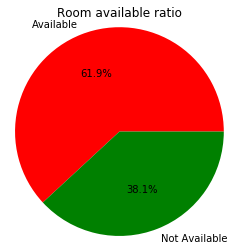

In [24]:

plt.axes(aspect='equal') # 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆,等同于 plt.axis('equal')

plt.pie(calendar['available'].value_counts(),labels= ['Available','Not Available'],autopct='%.1f%%',radius = 1.2,colors= ['r','g'])

plt.title('Room available ratio') # 设置title

plt.show()

### 设置扇形图样式

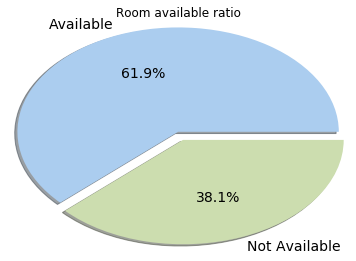

In [25]:
plt.pie(
         calendar.available.value_counts(),
         explode=(0,0.1),  #Not Available区块分离
         labels= ['Available','Not Available'],  #标签
         autopct='%1.1f%%',  #显示占比
         radius = 1.2,  #设置半径
         colors = ['#abcdef','#ccddaf'], #设置颜色
         textprops={'fontsize':14,'color':'black'},  #设置字体、颜色
         shadow = True #显示阴影 
)
plt.title('Room available ratio')
plt.show()

In [26]:
 calendar_demo = calendar.loc[:,['date','available']]

In [27]:
calendar_demo[:5]

,date,available
0,2019-09-24,f
1,2019-09-24,f
2,2019-09-25,f
3,2019-09-26,f
4,2019-09-27,f


In [28]:
calendar_demo['available_num'] = calendar_demo.available.map({'f':0,'t':1})

In [29]:
calendar_demo[:5]

,date,available,available_num
0,2019-09-24,f,0
1,2019-09-24,f,0
2,2019-09-25,f,0
3,2019-09-26,f,0
4,2019-09-27,f,0


In [30]:
calendar_demo = calendar_demo.groupby('date')[['available_num']].mean()

In [31]:
calendar_demo.reset_index(inplace= True)

In [32]:
calendar_demo.head()

,date,available_num
0,2019-09-23,0.350784
1,2019-09-24,0.462077
2,2019-09-25,0.603552
3,2019-09-26,0.637949
4,2019-09-27,0.646614


In [34]:
calendar_demo.date = pd.to_datetime(calendar_demo.date)

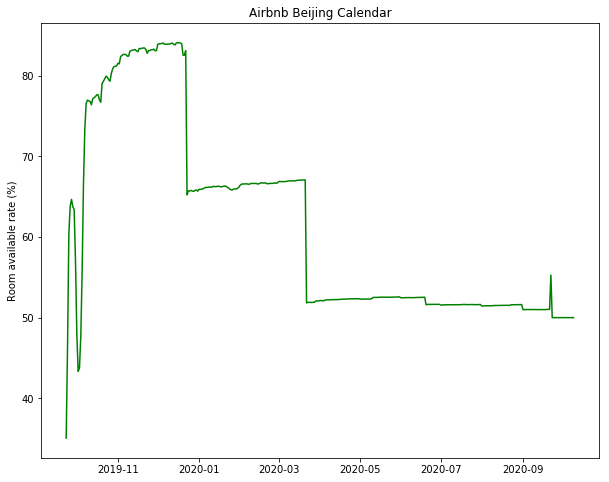

In [35]:
plt.figure(figsize = (10 , 8))
plt.plot(calendar_demo['date'] , calendar_demo.available_num*100,'g')
plt.title('Airbnb Beijing Calendar')
plt.ylabel('Room available rate (%)')
plt.show()

### 抽取两列生产新的DataFrame

In [36]:
new_calendar = calendar[['date','available']].copy()  #注意此处copy的作用

### apply函数的使用

In [37]:
new_calendar['isFull'] = calendar['available'].apply(lambda x:0 if x =='t' else 1)
new_calendar[:5]

,date,available,isFull
0,2019-09-24,f,1
1,2019-09-24,f,1
2,2019-09-25,f,1
3,2019-09-26,f,1
4,2019-09-27,f,1


### groupby的使用

In [38]:
new_calendar = new_calendar.groupby('date')[['isFull']].mean()
new_calendar.reset_index(inplace = True)

In [39]:
new_calendar[:5]

,date,isFull
0,2019-09-23,0.649216
1,2019-09-24,0.537923
2,2019-09-25,0.396448
3,2019-09-26,0.362051
4,2019-09-27,0.353386


In [40]:
calendar_demo = calendar[['date','available']].copy()

In [41]:
calendar_demo.head()

,date,available
0,2019-09-24,f
1,2019-09-24,f
2,2019-09-25,f
3,2019-09-26,f
4,2019-09-27,f


In [42]:
calendar_demo['isFull'] = calendar['available'].apply(lambda x:0 if x =='t' else 1)

In [43]:
calendar_demo = calendar_demo.groupby('date')[['isFull']].mean()

In [44]:
calendar_demo.reset_index() [:5]

,date,isFull
0,2019-09-23,0.649216
1,2019-09-24,0.537923
2,2019-09-25,0.396448
3,2019-09-26,0.362051
4,2019-09-27,0.353386


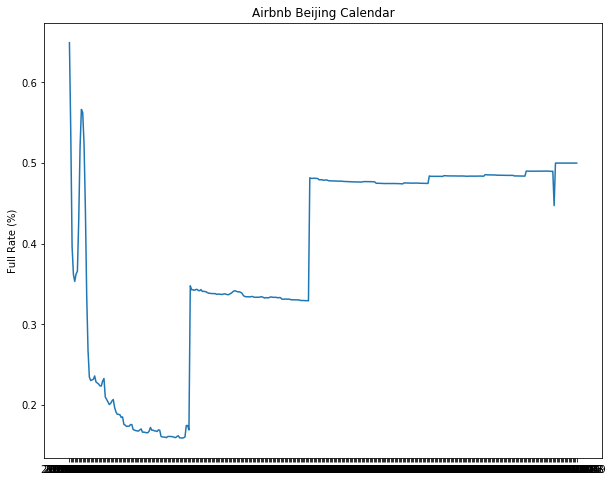

In [45]:
plt.figure(figsize = (10 , 8))
plt.plot(calendar_demo.index , calendar_demo['isFull'])
plt.title('Airbnb Beijing Calendar')
plt.ylabel('Full Rate (%)')
plt.show()

### 时间处理to_datetime()函数

In [46]:
new_calendar['date'] = pd.to_datetime(new_calendar.date)

In [47]:
new_calendar[:5]

,date,isFull
0,2019-09-23,0.649216
1,2019-09-24,0.537923
2,2019-09-25,0.396448
3,2019-09-26,0.362051
4,2019-09-27,0.353386


### 图表显示

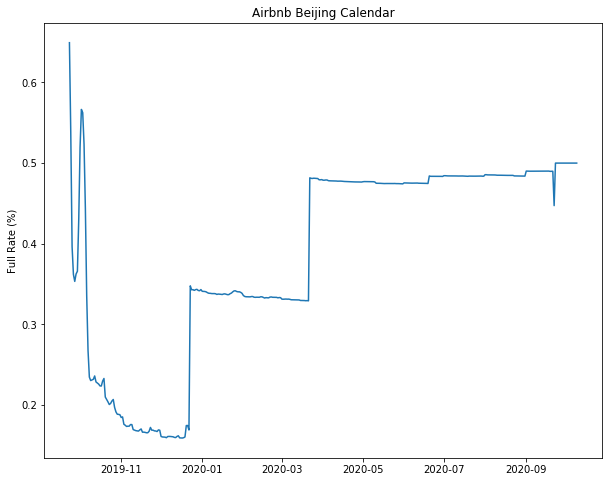

In [48]:
plt.figure(figsize = (10 , 8))
plt.plot(new_calendar['date'] , new_calendar['isFull'])
plt.title('Airbnb Beijing Calendar')
plt.ylabel('Full Rate (%)')
plt.show()

### astype()的使用

In [49]:
calendar['price'] = calendar['price'].str.replace(',','').str.replace('$','').astype(float)

In [50]:
calendar['date'] = pd.to_datetime(calendar['date'])

### 柱状图显示

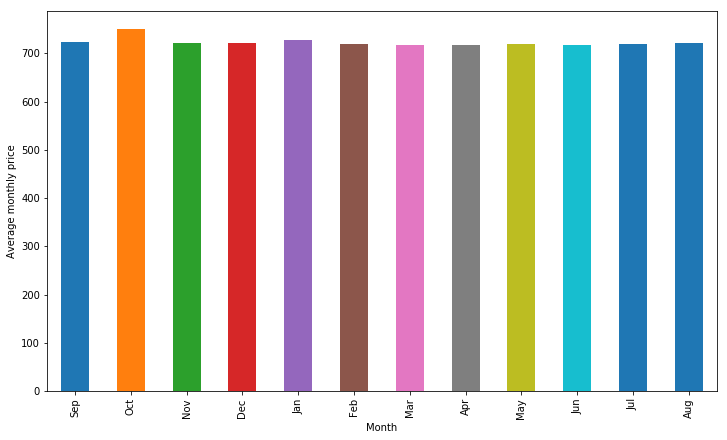

In [51]:
mean_price_of_month = calendar.groupby(calendar['date'].dt.strftime('%b'),sort = False)['price'].mean()
mean_price_of_month.plot('bar',figsize=(12,7))
plt.ylabel('Average monthly price')
plt.xlabel('Month')
plt.show()

### weekday_name

In [52]:
calendar['dayofweek'] =calendar.date.dt.weekday_name
weekdays = calendar['dayofweek'].unique().tolist()

In [53]:
weekdays

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']

In [54]:
weekdays = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

### reindex

In [55]:
price_of_weekday = calendar.groupby('dayofweek')['price'].mean().reindex(weekdays)

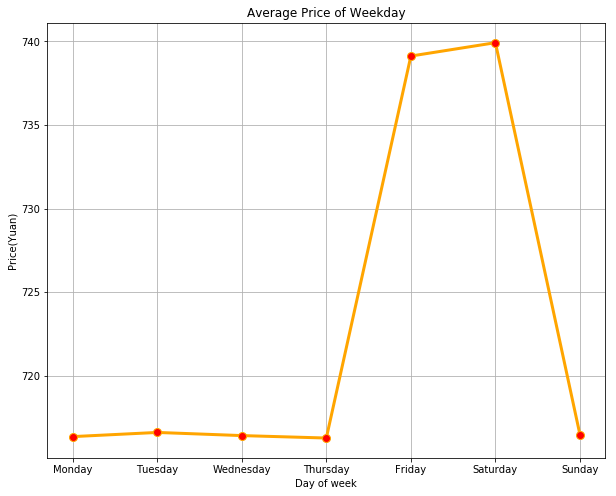

In [56]:
plt.figure(figsize=(10,8))
plt.plot(price_of_weekday,linewidth=3, color='orange',marker= 'o',markerfacecolor='r', markersize= 8)
plt.xlabel('Day of week')  #x轴坐标
plt.ylabel('Price(Yuan)')   #y轴坐标
plt.title('Average Price of Weekday')  #设置标题
plt.grid()  #显示网格